In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, count, avg, desc, when

# I m opening a Spark session and loading data.
spark = SparkSession.builder.appName("DigitalBank_Payment_Analysis").getOrCreate()

# Payment data must be uploaded
payments_path = "/content/olist_order_payments_dataset.csv"
df_payments = spark.read.csv(payments_path, header=True, inferSchema=True)

# Risk and Behavioral Analysis for Banks (Business Logic)
payment_analysis = df_payments.groupBy("payment_type").agg(
    count("order_id").alias("total_transactions"),
    avg("payment_installments").alias("avg_installments"),
    sum("payment_value").alias("total_revenue"),
    avg("payment_value").alias("avg_order_value")
).orderBy(desc("total_revenue"))

# Actionable Insight
# We identify transactions with "High Risk/Credit Need" that involve 12 installments or more.
high_installment_risk = df_payments.filter(col("payment_installments") >= 12) \
    .select("order_id", "payment_type", "payment_installments", "payment_value")

print("Digital Bank Analysis Ready! Payment Type Distribution:")
payment_analysis.show()

print("Examples of Transactions with High Credit Potential (12+ Installments):")
high_installment_risk.show(5)

Digital Bank Analysis Ready! Payment Type Distribution:
+------------+------------------+-----------------+--------------------+------------------+
|payment_type|total_transactions| avg_installments|       total_revenue|   avg_order_value|
+------------+------------------+-----------------+--------------------+------------------+
| credit_card|             76795|3.507155413763917|1.2542084189999508E7|163.31902063935814|
|      boleto|             19784|              1.0|  2869361.2699999996| 145.0344354023453|
|     voucher|              5775|              1.0|  379436.87000000046|  65.7033541125542|
|  debit_card|              1529|              1.0|  217989.79000000018|142.57017004578168|
| not_defined|                 3|              1.0|                 0.0|               0.0|
+------------+------------------+-----------------+--------------------+------------------+

Examples of Transactions with High Credit Potential (12+ Installments):
+--------------------+------------+--------

In [2]:

from pyspark.sql.functions import col, sum, count, avg, desc, round

# install spark
spark = SparkSession.builder.appName("KAF_DigitalBank_Project").getOrCreate()

# read file
payments = spark.read.csv("olist_order_payments_dataset.csv", header=True, inferSchema=True)

# STRATEGIC ANALYSIS FOR THE BANK: Segmentation by installment numbers
# This analysis shows which customers the bank can offer credit products to.
bank_insight = payments.groupBy("payment_installments").agg(
    count("order_id").alias("transaction_count"),
    round(avg("payment_value"), 2).alias("avg_loan_amount"),
    round(sum("payment_value"), 2).alias("total_credit_volume")
).orderBy(desc("payment_installments"))

print("KAF Group Digital Banking Strategic Insight Table:")
bank_insight.show()


KAF Group Digital Banking Strategic Insight Table:
+--------------------+-----------------+---------------+-------------------+
|payment_installments|transaction_count|avg_loan_amount|total_credit_volume|
+--------------------+-----------------+---------------+-------------------+
|                  24|               18|         610.05|           10980.88|
|                  23|                1|         236.48|             236.48|
|                  22|                1|         228.71|             228.71|
|                  21|                3|          243.7|              731.1|
|                  20|               17|          615.8|           10468.63|
|                  18|               27|         486.48|           13135.05|
|                  17|                8|          174.6|            1396.82|
|                  16|                5|         292.69|            1463.47|
|                  15|               74|         445.55|           32970.93|
|                  14|   

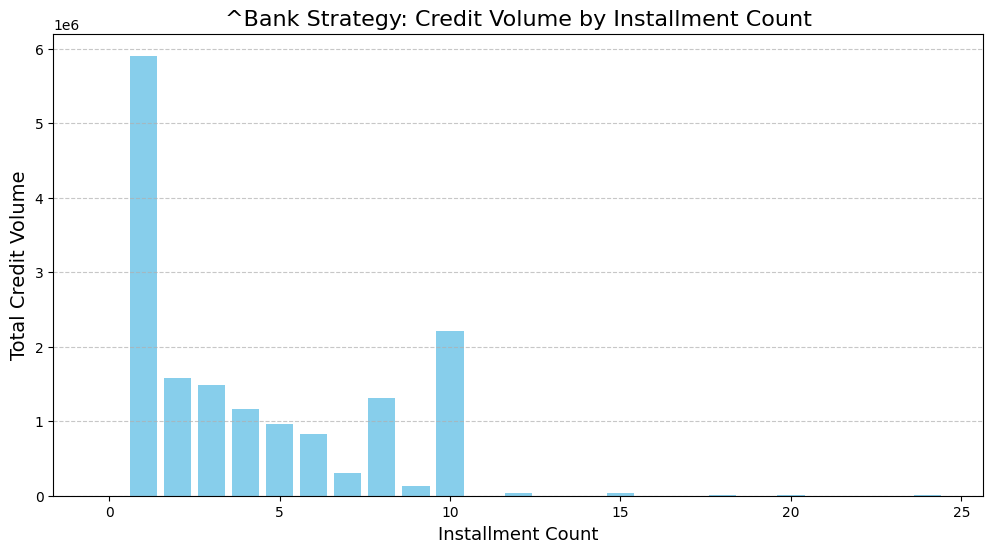

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# We are converting Spark data to Pandas for visualization.
pandas_bank_insight = bank_insight.toPandas()

# Creating a Graph for Installment Count and Total Loan Volume
plt.figure(figsize=(12, 6))
plt.bar(pandas_bank_insight['payment_installments'],
        pandas_bank_insight['total_credit_volume'],
        color='skyblue')

plt.title('^Bank Strategy: Credit Volume by Installment Count', fontsize=16)
plt.xlabel('Installment Count', fontsize=13)
plt.ylabel('Total Credit Volume', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# save graphic
plt.savefig('bank_strategy_analysis.png')
plt.show()